**Step 0:** Please run the following cell before beginning your experiment.

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

For convenience, let us write a function which take the data as input and output the least square estimators of the intercept and slope. The data is input in the following format: `x` being a `np.array` of the $x_i$'s, and `y` being a `np.array` of the $y_i$'s. 

In [50]:
def lin_regress_coeff(x,y):
    x_centered = x - np.mean(x)
    y_centered = y - np.mean(y)
    Sxy = np.dot(x_centered, y_centered)
    Sxx = sum(x_centered**2)
    beta_hat_1 = Sxy / Sxx
    beta_hat_0 = np.mean(y) - beta_hat_1 * np.mean(x)
    return beta_hat_0, beta_hat_1

**Step 1:** For fairness of the experiment, we first fix the $x_i$'s of the fake data, the true intercept $\beta_0$, the true slope $\beta_1$, and the standard deviation $\sigma > 0$ of the random noise. Note that in Python, indices start from zero, so we will run the indices from $i = 0$ to $i = n$ with $n+1$ data points.

In [51]:
# You may edit the following parameters
beta_0 = 1
beta_1 = 1.5
sigma = 2
m = 500

# Let us use x_i = i*(10/n+1) for i = 0 to i = n. There is a shortcut of generating the array, namely np.linspace. 
n = 10
x = np.linspace(0.,10.,n+1) # this is due to the con

In [52]:
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

**Step 2:** Repeat the following steps:
- We simulate the noises for this $j$-th experiment: $\epsilon_1^{(j)}, \epsilon_2^{(j)}, ..., \epsilon_n^{(j)}$, which are mutually independent and identically $\mathsf{N}(0,\sigma^2)$ distributed.
- For each $i$, we obtain $y_i^{(j)} = \beta_0 + \beta_1 x_i + \epsilon^{(j)}_i$.
- We obtain the least square estimates for intercept ($\hat{\beta}_0^{(j)}$) and slope ($\hat{\beta}_1^{(j)}$).
- We compute the RSS for this experiment by using the formula
\begin{equation}
    \text{RSS}^{(j)} = \sum_{i=1}^n (y_i^{(j)} - \hat{\beta}_0^{(j)} - \hat{\beta}_1^{(j)} x_i)^2
\end{equation}

In [53]:
# creating empty list for storing the estimates and RSS
beta_hat_0_arr = []
beta_hat_1_arr = []
rss_arr = []

for j in np.arange(m):
    
    # simulate the noises and creating the fake data
    y = beta_0 + beta_1 * x + sigma * np.random.randn(*x.shape)
    
    # computing the least square estimates
    beta_hat_0, beta_hat_1 = lin_regress_coeff(x,y)
    
    # compute the RSS
    y_hat = beta_hat_0 + beta_hat_1 * x
    err = np.linalg.norm(y-y_hat)**2
    
    # storing the estimates and RSS in the arrays
    beta_hat_0_arr += [beta_hat_0]
    beta_hat_1_arr += [beta_hat_1]
    rss_arr += [err]

**Step 3:** We plot the histogram based on the computed $\text{RSS}^{(1)}, ..., \text{RSS}^{(m)}$.

C:\Users\godin\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


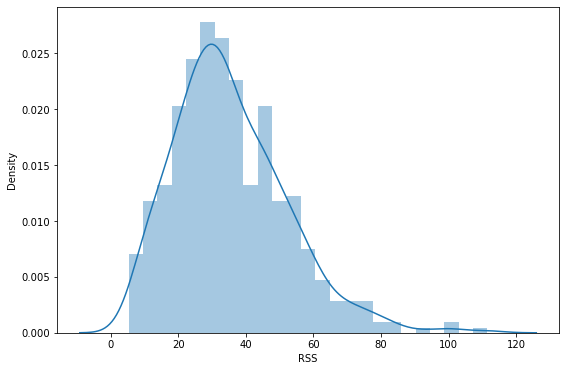

In [65]:
# converting the list into a suitable format
rss_series = pd.Series(rss_arr, dtype="float64")

# creating the histogram
fig_err, ax_err = plt.subplots(figsize=(9,6))
sns.distplot(rss_series, bins=25, ax=ax_err)
ax_err.set_xlabel("RSS")
# plt.savefig("unscaled_RSS")

**Extra:** Let us compare our histogram with the theoretical distribution. For convenience, let us "standardise" the RSS by dividing each of them by the variance of the noise $\sigma^2$.

C:\Users\godin\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


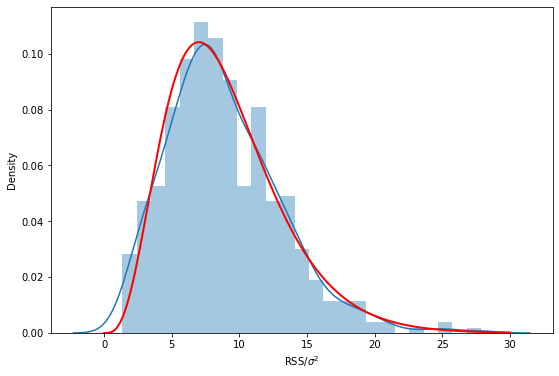

In [67]:
fig_err, ax_err = plt.subplots(figsize=(9,6))
sns.distplot(rss_series.div(sigma**2), bins=25, ax=ax_err)
plot_pt = np.linspace(0,30,200)
ax_err.plot(plot_pt, stats.chi2(df=n-2+1).pdf(plot_pt), 'r-', lw=2)
ax_err.set_xlabel("RSS/$\sigma^2$")
# plt.savefig("scaled_RSS")

**Where does the distribution concentrate? Compare the mean with the value $n-1$.**

We may also look at the distributions of $\hat{\beta}_0$ and $\hat{\beta}_1$ as well.

C:\Users\godin\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\godin\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


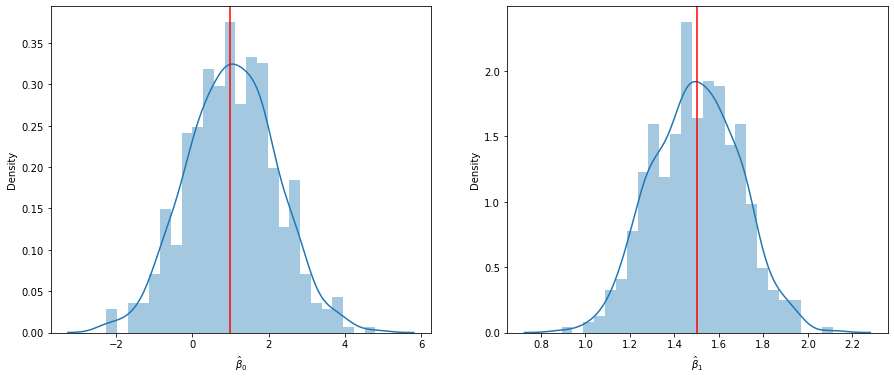

In [84]:
# converting the list of beta into suitable format
beta_hat_0_series = pd.Series(beta_hat_0_arr, dtype="float64")
beta_hat_1_series = pd.Series(beta_hat_1_arr, dtype="float64")

# creating histogram
fig_beta, ax_beta = plt.subplots(figsize=(15,6), ncols=2, nrows=1)
sns.distplot(beta_hat_0_series, bins=25, ax=ax_beta[0])
# ax_beta[0].vlines(beta_0, 0, 1.2, colors="red")
ax_beta[0].axvline(beta_0, color='red')
ax_beta[0].set_xlabel(r"$\hat{\beta}_0$")
sns.distplot(beta_hat_1_series, bins=25, ax=ax_beta[1])
ax_beta[1].axvline(beta_1, color='red')
ax_beta[1].set_xlabel(r"$\hat{\beta}_1$")

# plt.savefig("beta_0_hat and beta_1_hat")

**Warning of extrapolation:** The blue line represents the true line grey lines represent the estimated lines (with slope and intercept obtained from regression). The green region represents the region where the data lies. When extrapolating outside of this region, the grey lines gradually deviate from the blue line. This suggests that one should not extrapolate from the data.

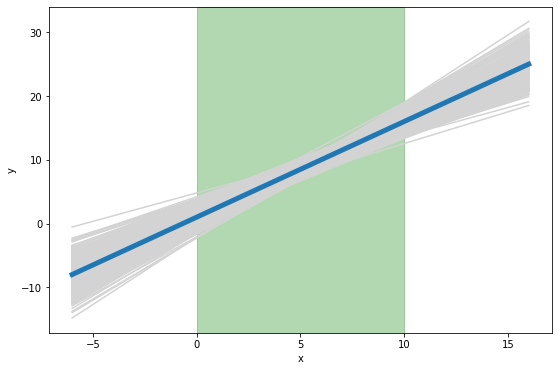

In [86]:
fig, ax = plt.subplots(figsize=(9,6))
x_plot = np.linspace(-6., 16, 2)
y_plot = beta_0 + beta_1 * x_plot

for j in np.arange(m):
    y_plot_hat = beta_hat_0_arr[j] + beta_hat_1_arr[j] * x_plot
    ax.plot(x_plot, y_plot_hat, color="lightgray")
    
ax.plot(x_plot, y_plot, linewidth=5)
ax.axvspan(0, 10, alpha=.3, color='green')
ax.set_xlabel("x")
ax.set_ylabel("y")

# plt.savefig("extrapolation")